In [1]:
import pandas as pd

In [2]:
fd = pd.read_csv('train (2).csv')
fd

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df = fd[['SalePrice' , 'GarageQual' , 'FireplaceQu']]
df

,SalePrice,GarageQual,FireplaceQu
0,208500,TA,NaN
1,181500,TA,TA
2,223500,TA,TA
3,140000,TA,Gd
4,250000,TA,TA
...,...,...,...
1455,175000,TA,TA
1456,210000,TA,TA
1457,266500,TA,Gd
1458,142125,TA,NaN


In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SalePrice    1460 non-null   int64 
 1   GarageQual   1379 non-null   object
 2   FireplaceQu  770 non-null    object
dtypes: int64(1), object(2)
memory usage: 34.3+ KB


,0
SalePrice,0
GarageQual,81
FireplaceQu,690


In [5]:
df.isnull().mean()*100

,0
SalePrice,0.000000
GarageQual,5.547945
FireplaceQu,47.260274


In [6]:
df['GarageQual'].unique()        # object_isstring as the_column iscategorical

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [7]:
df['GarageQual'].value_counts()

,count
GarageQual,
TA,1311
Fa,48
Gd,14
Ex,3
Po,3


Text(0, 0.5, 'no.of houses')

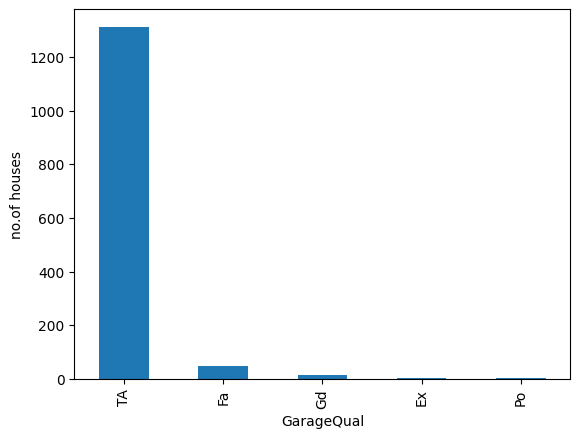

In [8]:


import matplotlib.pyplot as plt
df['GarageQual'].value_counts() .plot.bar()            #  with graph_format
plt.ylabel("no.of houses")


In [9]:
df['GarageQual'].mode()

,GarageQual
0,TA


Text(0.5, 1.0, 'GarageQual ')

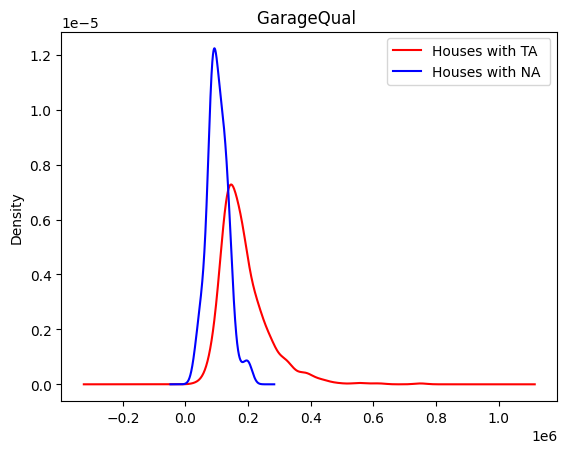

In [10]:
fog = plt.figure()

axis = fog.add_subplot(111)

#with most_occuring object against the salesprice -ourtargetColumn
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=axis,color='red')

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=axis,color='blue')


#added the legends
lines, labels = axis.get_legend_handles_labels()
labels = ['Houses with TA' ,'Houses with NA ']
axis.legend(lines, labels, loc='best')

plt.title('GarageQual ')

In [11]:
temp=df[df['GarageQual']=='TA']['SalePrice']      # save_values

In [12]:
# with inplace=True it permantely replaces value and modifyDF

df['GarageQual'].fillna('TA',inplace=True)
df['GarageQual'].value_counts()

/tmp/ipython-input-12-3063957010.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('TA',inplace=True)
/tmp/ipython-input-12-3063957010.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GarageQual'].fillna('TA',inplace=True)


,count
GarageQual,
TA,1392
Fa,48
Gd,14
Ex,3
Po,3


Text(0.5, 1.0, 'GarageQual 2')

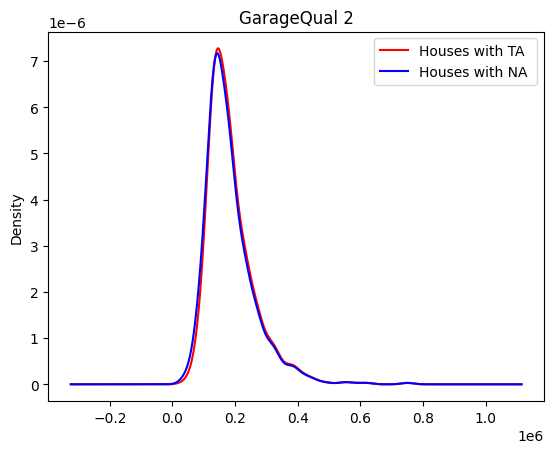

In [13]:
fog = plt.figure()

axis = fog.add_subplot(111)

# with the eariler TA which was containig_values=1311
temp.plot(kind='kde',ax=axis,color='red')

#withnew_one
df[df['GarageQual']=="TA"]['SalePrice'].plot(kind='kde',ax=axis,color='blue')


#added the legends
lines, labels = axis.get_legend_handles_labels()
labels = ['Houses with TA' ,'Houses with NA ']
axis.legend(lines, labels, loc='best')

plt.title('GarageQual 2')

In [14]:
# with another COlumn FireplaceQu

In [15]:
df['FireplaceQu'].value_counts()

,count
FireplaceQu,
Gd,380
TA,313
Fa,33
Ex,24
Po,20


<Axes: xlabel='FireplaceQu'>

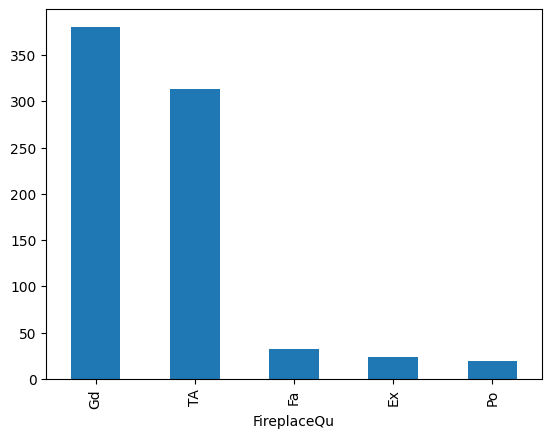

In [16]:
df['FireplaceQu'].value_counts().plot.bar()

In [17]:
df['FireplaceQu'].mode()

,FireplaceQu
0,Gd


Text(0.5, 1.0, 'FireplaceQu ')

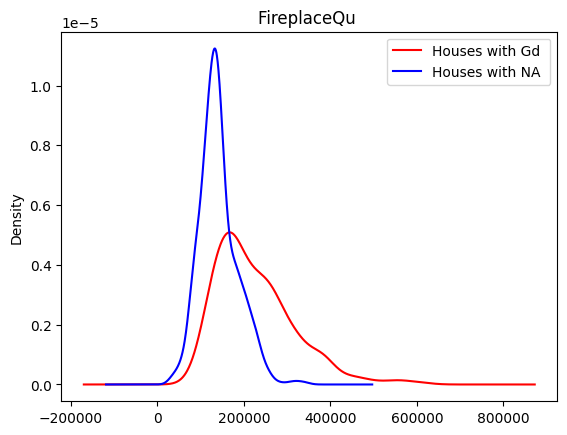

In [18]:
fog = plt.figure()

axis = fog.add_subplot(111)

#with most_occuring object against the salesprice -ourtargetColumn
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=axis,color='red')

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=axis,color='blue')


#added the legends
lines, labels = axis.get_legend_handles_labels()
labels = ['Houses with Gd' ,'Houses with NA ']
axis.legend(lines, labels, loc='best')

plt.title('FireplaceQu ')

In [19]:
t=df[df['FireplaceQu']=='Gd']['SalePrice']      # save_values

df['FireplaceQu'].fillna('Gd',inplace=True)
df['FireplaceQu'].value_counts()

/tmp/ipython-input-19-155290083.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna('Gd',inplace=True)
/tmp/ipython-input-19-155290083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FireplaceQu'].fillna('Gd',inplace=True)


,count
FireplaceQu,
Gd,1070
TA,313
Fa,33
Ex,24
Po,20


Text(0.5, 1.0, 'FireplaceQu 2 ')

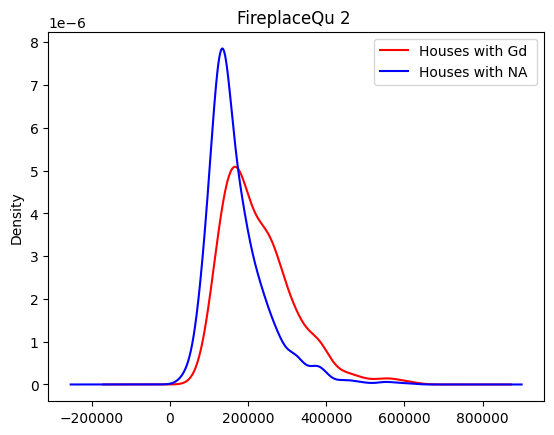

In [20]:
fog = plt.figure()

axis = fog.add_subplot(111)

#with most_occuring object against the salesprice -ourtargetColumn
t.plot(kind='kde',ax=axis,color='red')

df[df['FireplaceQu']=="Gd"]['SalePrice'].plot(kind='kde',ax=axis,color='blue')


#added the legends
lines, labels = axis.get_legend_handles_labels()
labels = ['Houses with Gd' ,'Houses with NA ']
axis.legend(lines, labels, loc='best')

plt.title('FireplaceQu 2 ')


# still not as the misssing_valuesaremoreinthisCOlumn's

  WITHOUT USING MODE IMPUTATION i.e BY SKLEARN

In [21]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'] ,random_state=1)
# by default the 0.75 goes train_set


In [22]:
from sklearn.impute import SimpleImputer

imp1 = SimpleImputer(strategy='most_frequent')


In [23]:
x_train = imp1.fit_transform(x_train)
x_test  = imp1.transform(x_test)

In [26]:
imp1.statistics_    # for the first and second columnsthese_aretheresp.missing_values

array(['TA', 'Gd'], dtype=object)